<a href="https://colab.research.google.com/github/Venkatakousik/FML/blob/main/M11_Data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
data  =pd.read_csv('drive/MyDrive/ML/titanic.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [174]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [175]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Scaling the input feature and removing the null values in it


In [176]:
data['Age'].mean(), data['Age'].std(), data['Age'].min(), data['Age'].max(), data['Age'].var()

(30.272590361445783, 14.181209235624422, 0.17, 76.0, 201.10669538455943)

In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [178]:
#count of no of null values in Age column of titanic dataset
# data.isnull().sum()
data['Age'].isnull().sum()

86

In [179]:
data['Age'] = data['Age'].fillna(50)

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Age'>

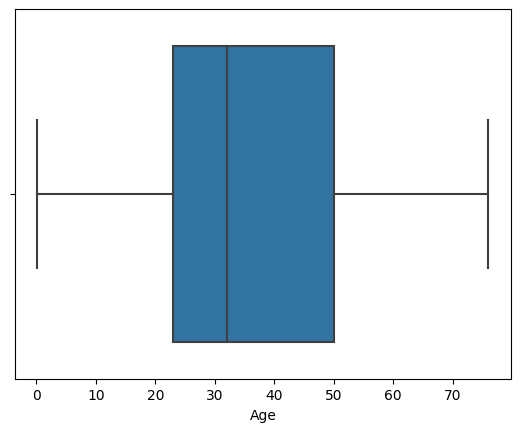

In [181]:
sns.boxplot(x=data['Age'])

In [182]:
import numpy as np
np.array(data['Age']).shape

(418,)

In [183]:
X = np.array(data['Age']).reshape(-1,1)

In [184]:
X[:5]

array([[34.5],
       [47. ],
       [62. ],
       [27. ],
       [22. ]])

In [185]:
X.shape

(418, 1)

In [186]:
scaler.fit(X)

StandardScaler()

In [187]:
Y = scaler.transform(X)

In [188]:
Y.dtype

dtype('float64')

In [189]:
Y.mean()

-1.4661318411317857e-16

In [190]:
Y.std()

1.0

In [191]:
data['Age'] = pd.Series(Y.reshape(-1))

In [192]:
data['Age'].shape

(418,)

In [193]:
data['Age'].mean(), data['Age'].std(), data['Age'].min(), data['Age'].max()

(-1.4661318411317857e-16,
 1.0011983227786452,
 -2.2884093578855293,
 2.791311843529663)

In [194]:
# Removing outliers
q1 = data["Age"].quantile(0.25)
q3 = data["Age"].quantile(0.75)
iqr=q3-q1
print(iqr)


up=q3+1.5*iqr
down=q1-1.5*iqr

print(up,down)
    
outlier=[]
age=data["Age"]

for i in age:
    if i>up:
      outlier.append(i)
      # print("Up Outlier",i)
        
for i in age:
  if i<down:
    outlier.append(i)

print(outlier)

1.8086835347251773
3.762641889956147 -3.4720922489445623
[]


In [195]:
# scaling all the columns at once

sex = pd.get_dummies(data['Sex'])
embark = pd.get_dummies(data['Embarked'])

data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [196]:
sex,embark

(     female  male
 0         0     1
 1         1     0
 2         0     1
 3         0     1
 4         1     0
 ..      ...   ...
 413       0     1
 414       1     0
 415       0     1
 416       0     1
 417       0     1
 
 [418 rows x 2 columns],
      C  Q  S
 0    0  1  0
 1    0  0  1
 2    0  1  0
 3    0  0  1
 4    0  0  1
 ..  .. .. ..
 413  0  0  1
 414  1  0  0
 415  0  0  1
 416  0  0  1
 417  1  0  0
 
 [418 rows x 3 columns])

In [201]:
data = pd.concat([data,sex,embark],axis=1)

In [202]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,female,male,C,Q,S
0,892,0,3,0.011298,0,0,7.8292,0,1,0,1,0,0,1,0,1,0
1,893,1,3,0.848652,1,0,7.0000,1,0,0,0,1,1,0,0,0,1
2,894,0,2,1.853476,0,0,9.6875,0,1,0,1,0,0,1,0,1,0
3,895,0,3,-0.491114,0,0,8.6625,0,1,0,0,1,0,1,0,0,1
4,896,1,3,-0.826055,1,1,12.2875,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1.049617,0,0,8.0500,0,1,0,0,1,0,1,0,0,1
414,1306,1,1,0.312746,0,0,108.9000,1,0,1,0,0,1,0,1,0,0
415,1307,0,3,0.279251,0,0,7.2500,0,1,0,0,1,0,1,0,0,1
416,1308,0,3,1.049617,0,0,8.0500,0,1,0,0,1,0,1,0,0,1


In [199]:
data.drop(['Cabin'],axis=1,inplace=True)

In [200]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,0,3,0.011298,0,0,7.8292,0,1,0,1,0
1,893,1,3,0.848652,1,0,7.0000,1,0,0,0,1
2,894,0,2,1.853476,0,0,9.6875,0,1,0,1,0
3,895,0,3,-0.491114,0,0,8.6625,0,1,0,0,1
4,896,1,3,-0.826055,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1.049617,0,0,8.0500,0,1,0,0,1
414,1306,1,1,0.312746,0,0,108.9000,1,0,1,0,0
415,1307,0,3,0.279251,0,0,7.2500,0,1,0,0,1
416,1308,0,3,1.049617,0,0,8.0500,0,1,0,0,1
